In [546]:
import numpy as np
from pymatreader import read_mat

data = read_mat(r"C:\Users\nunok\Documents\2021\Attractiveness\EEG_predict\eeg_data\timelock1.mat")


In [547]:
array = data["timelock"]["trial"]

In [548]:
data["timelock"]["label"]

['Fp1',
 'Fpz',
 'Fp2',
 'F7',
 'F3',
 'F4',
 'F8',
 'FC5',
 'FC2',
 'FC6',
 'M1',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'M2',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'POz',
 'O1',
 'Oz',
 'O2',
 'AF3',
 'AF4',
 'F5',
 'F1',
 'F2',
 'F6',
 'FC3',
 'FCz',
 'FC4',
 'C1',
 'C2',
 'C6',
 'CP3',
 'CP4',
 'P5',
 'P1',
 'P2',
 'P6',
 'PO5',
 'PO3',
 'PO4',
 'PO6',
 'FT7',
 'FT8',
 'TP7',
 'TP8',
 'PO7',
 'PO8']

In [ ]:
#604(evaluations)x58(electrodes)x425(epochs)

In [ ]:
#access the desired data as a Numpy array and convert that into a Raw object using mne.io.RawArray

In [2]:
import mne

In [102]:
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f'{montage_name}: {montage_description}')

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

In [5]:
mne.channels.make_standard_montage("biosemi64", head_size=0.095)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 64 channels>

In [ ]:
#requires in this format: (n_epochs, n_channels, n_samples)

In [549]:
array=np.swapaxes(array,0,2)

In [7]:
array.shape

(425, 58, 604)

In [550]:
sampling_freq = 250

info = mne.create_info(ch_names=data["timelock"]["label"],
                       ch_types=['eeg'] * len(data["timelock"]["label"]),
                       sfreq=sampling_freq)

In [88]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, F4, F8, FC5, FC2, FC6, M1, T7, C3, Cz, ...
 chs: 58 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 58
 projs: []
 sfreq: 250.0 Hz
>

In [551]:
epochs = mne.EpochsArray(array, info)

Not setting metadata
425 matching events found
No baseline correction applied
0 projection items activated


In [552]:
#remove "M1" and "M2"
indx = []
for i in range(len(epochs.ch_names)):
    if epochs.ch_names[i] == "M1" or epochs.ch_names[i] =="M2":
        indx.append(i)

In [553]:
array = np.delete(array, [10,16], axis=1)

In [554]:
array.shape

(425, 56, 604)

In [412]:
ch_names = [i for i in data["timelock"]["label"] if i not in ["M1","M2"]]

In [555]:
sampling_freq = 250

info = mne.create_info(ch_names=ch_names,
                       ch_types=['eeg'] * len(ch_names),
                       sfreq=sampling_freq)

In [556]:
epochs = mne.EpochsArray(array, info)

Not setting metadata
425 matching events found
No baseline correction applied
0 projection items activated


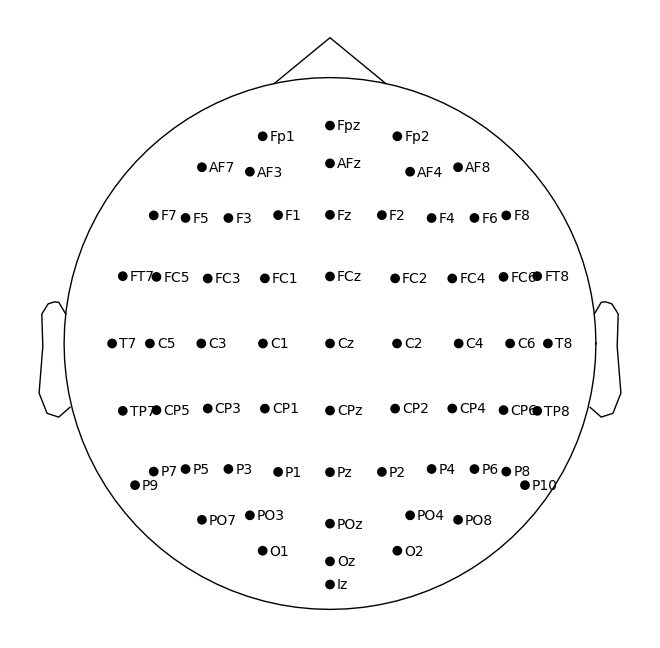

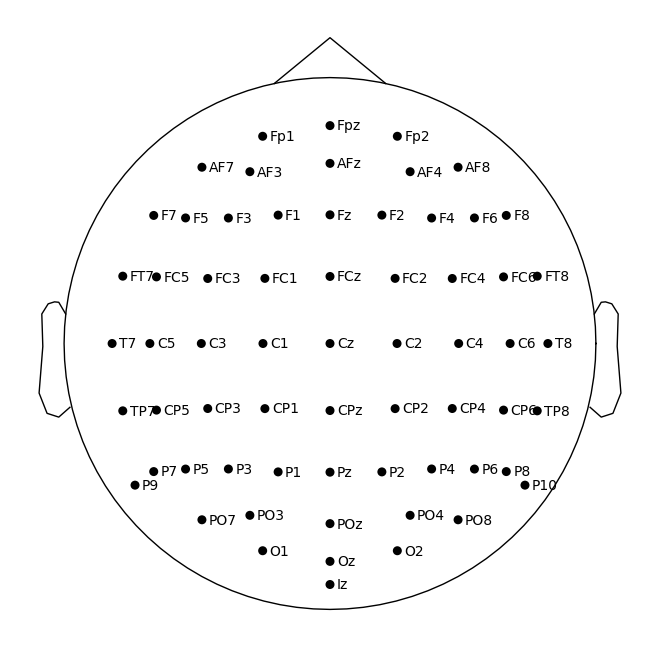

In [9]:
biosemi_montage = mne.channels.make_standard_montage('biosemi64')
biosemi_montage.plot(show_names=True)

Not setting metadata
425 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


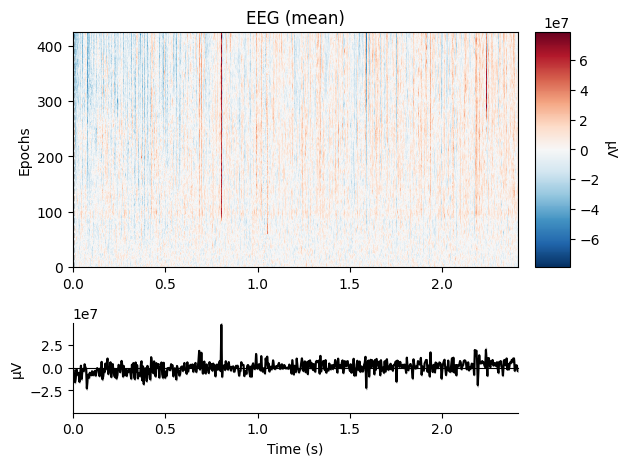

[<Figure size 640x480 with 3 Axes>]

In [416]:
epochs.plot_image( combine='mean')

In [16]:
epochs.info["chs"]

[{'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
  'unit_mul': 0 (FIFF_UNITM_NONE),
  'range': 1.0,
  'cal': 1.0,
  'kind': 2 (FIFFV_EEG_CH),
  'coil_type': 1 (FIFFV_COIL_EEG),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'ch_name': 'Fp1',
  'scanno': 1,
  'logno': 1},
 {'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
  'unit_mul': 0 (FIFF_UNITM_NONE),
  'range': 1.0,
  'cal': 1.0,
  'kind': 2 (FIFFV_EEG_CH),
  'coil_type': 1 (FIFFV_COIL_EEG),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'ch_name': 'Fpz',
  'scanno': 2,
  'logno': 2},
 {'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
  'unit_mul': 0 (FIFF_UNITM_NONE),
  'range': 1.0,
  'cal': 1.0,
  'kind': 2 (FIFFV_EEG_CH),
  'coil_type': 1 (FIFFV_COIL_EEG),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'ch_name': 'Fp2',
  'scanno': 3,
  'logno': 3},
 {'loc': array([nan, nan, na

In [417]:
# Ugly hack due to acquisition problem when specifying the channel types
#layout = mne.layouts.read_layout('Vectorview-mag.lout')
layout = mne.channels.make_standard_montage('biosemi64')
layout_ = mne.channels.read_layout('biosemi')


In [233]:
layout_.pos

array([[0.29597651, 0.88106002, 0.06984672, 0.05539567],
       [0.18796671, 0.82602634, 0.06984672, 0.05539567],
       [0.28399821, 0.79501828, 0.06984672, 0.05539567],
       [0.33682425, 0.70780938, 0.06984672, 0.05539567],
       [0.25668491, 0.70894444, 0.06984672, 0.05539567],
       [0.17732424, 0.71979178, 0.06984672, 0.05539567],
       [0.10224951, 0.74030915, 0.06984672, 0.05539567],
       [0.04721584, 0.63229935, 0.06984672, 0.05539567],
       [0.13262152, 0.62123557, 0.06984672, 0.05539567],
       [0.22978157, 0.61142751, 0.06984672, 0.05539567],
       [0.32041185, 0.60786401, 0.06984672, 0.05539567],
       [0.31884268, 0.51256968, 0.06984672, 0.05539567],
       [0.22197942, 0.51256968, 0.06984672, 0.05539567],
       [0.12511593, 0.51256968, 0.06984672, 0.05539567],
       [0.02825243, 0.51256968, 0.06984672, 0.05539567],
       [0.04721584, 0.39284001, 0.06984672, 0.05539567],
       [0.13262152, 0.40390379, 0.06984672, 0.05539567],
       [0.22978157, 0.41371185,

In [236]:
layout_.names

['Fp1',
 'AF7',
 'AF3',
 'F1',
 'F3',
 'F5',
 'F7',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'C1',
 'C3',
 'C5',
 'T7',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'P1',
 'P3',
 'P5',
 'P7',
 'P9',
 'PO7',
 'PO3',
 'O1',
 'Iz',
 'Oz',
 'POz',
 'Pz',
 'CPz',
 'Fpz',
 'Fp2',
 'AF8',
 'AF4',
 'AFz',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT8',
 'FC6',
 'FC4',
 'FC2',
 'FCz',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP8',
 'CP6',
 'CP4',
 'CP2',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2']

In [418]:
coord = {}

for i in range(len(layout_.names)):
    chanel = layout_.names[i]
    coord[chanel] = layout_.pos[i][0:2]

coord



{'Fp1': array([0.29597651, 0.88106002]),
 'AF7': array([0.18796671, 0.82602634]),
 'AF3': array([0.28399821, 0.79501828]),
 'F1': array([0.33682425, 0.70780938]),
 'F3': array([0.25668491, 0.70894444]),
 'F5': array([0.17732424, 0.71979178]),
 'F7': array([0.10224951, 0.74030915]),
 'FT7': array([0.04721584, 0.63229935]),
 'FC5': array([0.13262152, 0.62123557]),
 'FC3': array([0.22978157, 0.61142751]),
 'FC1': array([0.32041185, 0.60786401]),
 'C1': array([0.31884268, 0.51256968]),
 'C3': array([0.22197942, 0.51256968]),
 'C5': array([0.12511593, 0.51256968]),
 'T7': array([0.02825243, 0.51256968]),
 'TP7': array([0.04721584, 0.39284001]),
 'CP5': array([0.13262152, 0.40390379]),
 'CP3': array([0.22978157, 0.41371185]),
 'CP1': array([0.32041185, 0.41727534]),
 'P1': array([0.33682425, 0.31732998]),
 'P3': array([0.25668491, 0.31619491]),
 'P5': array([0.17732424, 0.30534758]),
 'P7': array([0.10224951, 0.28483021]),
 'P9': array([0.04469764, 0.20125671]),
 'PO7': array([0.18796671, 0.

In [28]:
#mark as bad chanels (don't have location)
#epochs.info['bads'].extend(['M1', 'M2'])

#epochs.info['bads'] = ['M1', 'M2']

In [419]:
#change coord names accordingly to data
coord["PO6"] = coord["P6"]
coord["PO5"] = coord["P5"]
#coord["M1"] = np.array([0,0])
#coord["M2"] = np.array([0,0])

In [253]:
coord

{'Fp1': array([0.29597651, 0.88106002]),
 'AF7': array([0.18796671, 0.82602634]),
 'AF3': array([0.28399821, 0.79501828]),
 'F1': array([0.33682425, 0.70780938]),
 'F3': array([0.25668491, 0.70894444]),
 'F5': array([0.17732424, 0.71979178]),
 'F7': array([0.10224951, 0.74030915]),
 'FT7': array([0.04721584, 0.63229935]),
 'FC5': array([0.13262152, 0.62123557]),
 'FC3': array([0.22978157, 0.61142751]),
 'FC1': array([0.32041185, 0.60786401]),
 'C1': array([0.31884268, 0.51256968]),
 'C3': array([0.22197942, 0.51256968]),
 'C5': array([0.12511593, 0.51256968]),
 'T7': array([0.02825243, 0.51256968]),
 'TP7': array([0.04721584, 0.39284001]),
 'CP5': array([0.13262152, 0.40390379]),
 'CP3': array([0.22978157, 0.41371185]),
 'CP1': array([0.32041185, 0.41727534]),
 'P1': array([0.33682425, 0.31732998]),
 'P3': array([0.25668491, 0.31619491]),
 'P5': array([0.17732424, 0.30534758]),
 'P7': array([0.10224951, 0.28483021]),
 'P9': array([0.04469764, 0.20125671]),
 'PO7': array([0.18796671, 0.

In [421]:
import pyvistaqt
import mne
import mne_connectivity
from mne_connectivity import spectral_connectivity_epochs
tmin = 0
# Resting state Functional Connectivity analysis at the sensor level - Davide Aloi
### Global Variables ###
delta = 1-4
alpha = 8,13
theta = 4,8
beta = 13,30
fmin, fmax = alpha
min_epochs = 0 #Start from epoch n.
max_epochs = 425 #End at epoch n.
# Get the strongest connections
#n_con = 124*123 # show up to n_con connections THIS SHOULD BE CHECKED.
n_con = 3*2
min_dist = 0  # exclude sensors that are less than 4cm apart THIS SHOULD BE CHECKED
method = 'pli' # Method used to calculate the connectivity matrix


#Connectivity
from scipy import linalg
sfreq = epochs.info['sfreq']  # the sampling frequency

from itertools import combinations
# with indices


con = mne_connectivity.spectral_connectivity_epochs(epochs[min_epochs:max_epochs], method=method, mode='multitaper', sfreq=sfreq, fmin=fmin, fmax=fmax,
    faverage=True, tmin=tmin, mt_adaptive=False, n_jobs=1)




Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 1540 connections
    using t=0.000s..2.412s for estimation (604 points)
    frequencies: 8.3Hz..12.8Hz (12 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8


C:\Users\nunok\AppData\Local\Temp\ipykernel_5924\2328209686.py:30: RuntimeWarning:

There were no Annotations stored in <EpochsArray |  425 events (all good), 0 - 2.412 sec, baseline off, ~109.7 MB, data loaded,
 '1': 425>, so metadata was not modified.



    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for epoch 17
    computing connectivity for epoch 18
    computing connectivity for epoch 19
    computing connectivity for epoch 20
    computing connectivity for epoch 21
    computing connectivity for epoch 22
    computing connectivity for epoch 23
    computing connectivity for epoch 24
    computing connectivity for epoch 25
    computing connectivity for epoch 26
    computing connectivity for epoch 27
    computing connectivity for epoch 28
    computing connectivity for epoch 29
    computing connectivity for epoch 30
    computing connectivity for epoch 31
    computing connectivity for epoch 32
    computing connectivity for epoch 33
 

In [117]:
# con is a 3D array, get the connectivity for the first (and only) freq. band
# for each method
con_res = dict()
for method, c in zip(con_methods, con):
    con_res[method] = c.get_data(output='dense')[:, :, 0]

In [118]:
con_res

{'pli': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.38888889, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.12222222, 0.21111111, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.34444444, 0.22222222, 0.31111111, ..., 0.        , 0.        ,
         0.        ],
        [0.2       , 0.26666667, 0.13333333, ..., 0.37777778, 0.        ,
         0.        ],
        [0.42222222, 0.34444444, 0.44444444, ..., 0.35555556, 0.54444444,
         0.        ]]),
 'wpli2_debiased': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.30618451,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.08048813,  0.01306173,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.1576449 , -0.03798116,  0.16983109, ...,  0.        ,

In [120]:
from mne.datasets import sample
from mne.minimum_norm import apply_inverse_epochs, read_inverse_operator
from mne.viz import circular_layout
from mne_connectivity import spectral_connectivity_epochs
from mne_connectivity.viz import plot_connectivity_circle
import matplotlib as plt
label_names = epochs.ch_names

node_angles = circular_layout(label_names, start_pos=90,
                              group_boundaries=[0, len(label_names) / 2])

# Plot the graph using node colors from the FreeSurfer parcellation. We only
# show the 300 strongest connections.
fig, ax = plt.subplots(figsize=(8, 8), facecolor='black',
                       subplot_kw=dict(polar=True))
plot_connectivity_circle(con_res['pli'], label_names, n_lines=300,
                         node_angles=node_angles,
                         title='All-to-All Connectivity left-Auditory '
                               'Condition (PLI)', ax=ax)
fig.tight_layout()

TypeError: circular_layout() missing 1 required positional argument: 'node_order'

In [124]:
print(con.names)

['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'FC5', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2', 'AF3', 'AF4', 'F5', 'F1', 'F2', 'F6', 'FC3', 'FCz', 'FC4', 'C1', 'C2', 'C6', 'CP3', 'CP4', 'P5', 'P1', 'P2', 'P6', 'PO5', 'PO3', 'PO4', 'PO6', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8']


In [134]:
print(con.coords)

Coordinates:
  * node_in -> node_out  (node_in -> node_out) <U4 '0' '1' '2' ... '3362' '3363'
  * freqs                (freqs) float64 10.55


In [127]:
print(con.attrs.keys())

dict_keys(['spec_method', 'n_epochs_used', 'freqs_used', 'times_used', 'n_tapers', 'node_names', 'method', 'indices', 'n_nodes', 'events'])


In [25]:
print(con.freqs)

[10.554635761589404]


In [136]:
print(con.get_data(output='dense').shape)

(58, 58, 1)


In [508]:
matrix = con.get_data(output='dense')[:, :, 0]
matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19254902, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40980392, 0.48470588, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21529412, 0.22901961, 0.11490196, ..., 0.        , 0.        ,
        0.        ],
       [0.25647059, 0.24666667, 0.24941176, ..., 0.10784314, 0.        ,
        0.        ],
       [0.46156863, 0.15058824, 0.26823529, ..., 0.39607843, 0.23764706,
        0.        ]])

In [ ]:
#remove "M1" and "m2"
indices = [i for i in range(len(epochs.ch_names)) if epochs.ch_names[i] in ["M1","M2"]]

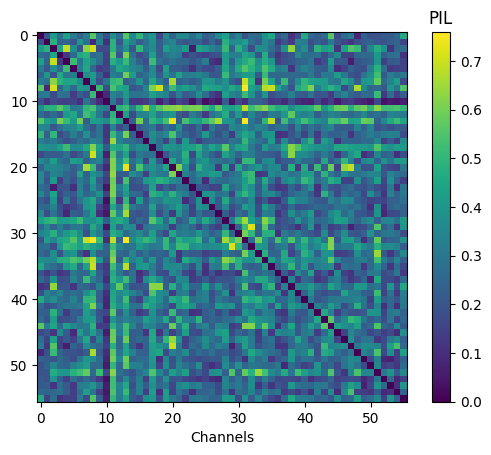

In [509]:
def plot_matrix(con,method):
    import numpy as np
    import matplotlib.pyplot as plt
    r_con = con + con.T - np.diag(np.diag(con)) #I reflect the matrix
    plt.imshow(r_con);
    clb = plt.colorbar()
    clb.ax.set_title(method)
    plt.xlabel('Channels')
    plt.show()
    return

plot_matrix(matrix, "PIL")

In [510]:
lista = []
for i in range(len(epochs.ch_names)):
    temp = []
    for j in range(i+1,len(epochs.ch_names)):
        temp.append([epochs.ch_names[i],epochs.ch_names[j]])
    lista.append(temp)

import itertools
con_nodes = list(itertools.chain(*lista))

In [205]:
matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.38888889, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12222222, 0.21111111, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.34444444, 0.22222222, 0.31111111, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.26666667, 0.13333333, ..., 0.37777778, 0.        ,
        0.        ],
       [0.42222222, 0.34444444, 0.44444444, ..., 0.35555556, 0.54444444,
        0.        ]])

In [424]:
#weights
weights = []
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        if i!=j:
            weights.append(matrix[i,j])


In [310]:
matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.38888889, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12222222, 0.21111111, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.34444444, 0.22222222, 0.31111111, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.26666667, 0.13333333, ..., 0.37777778, 0.        ,
        0.        ],
       [0.42222222, 0.34444444, 0.44444444, ..., 0.35555556, 0.54444444,
        0.        ]])

In [425]:
import networkx as nx
G = nx.Graph()

for x in epochs.ch_names:
	G.add_node(x,pos=(coord[x][0],coord[x][1]))

pos=nx.get_node_attributes(G,'pos')
con_nodes_new = np.array(con_nodes)


for x in range(0,len(con_nodes)):
	G.add_edge(con_nodes[x][0],con_nodes[x][1], weight=weights[x],alpha=weights[x])

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
plt.figure(figsize=(5, 5))

labels = {}
for x in range (0,len(epochs.ch_names)):
	labels[x] =  epochs.ch_names[x]  #Needed to show the correct electrode label

#Label positions needs to be changed in order to avoid the overlap with electrodes
label_pos = {k:v for k,v in pos.items()}
for i in pos:
	pos_x = pos[i][0]
	pos_y = pos[i][1]
	upd = {i:[pos_x+0.03,pos_y+0.01]}
	label_pos.update(upd)


<Figure size 500x500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

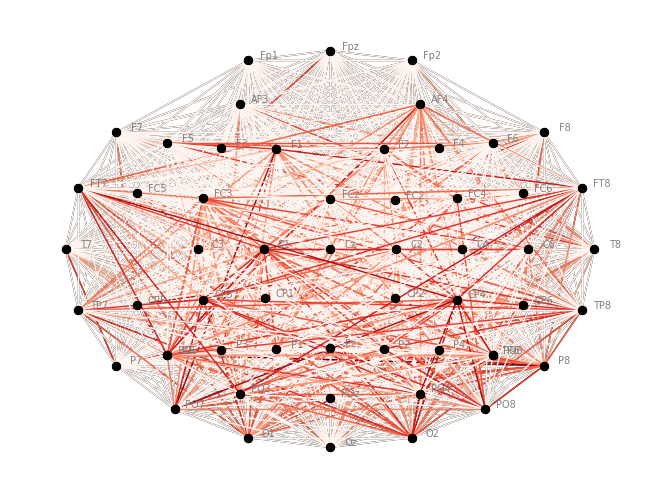

<Figure size 640x480 with 0 Axes>

In [426]:
nx.draw(G,pos,node_size=32,node_color='black')
nx.draw(G,pos,node_size=32,node_color='black',edge_color=weights,edge_cmap=plt.cm.Reds) #check how to add edge_vmin properly
nx.draw_networkx_labels(G,label_pos,font_size=7,font_color='grey')
plt.figure()

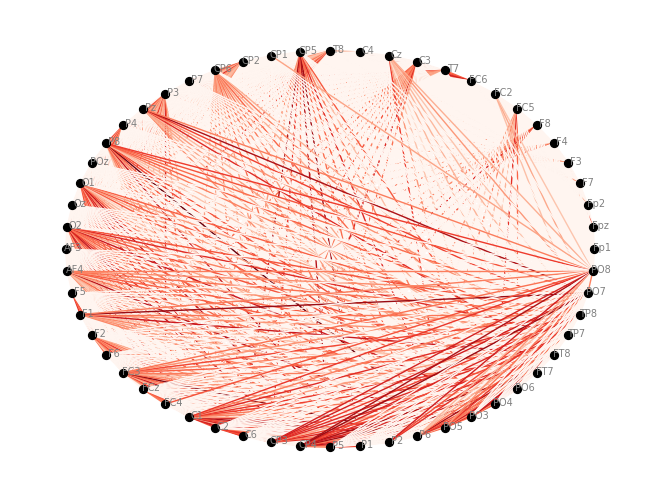

In [440]:
#small-world organization
def draw_smallworld(G,labels,weights):
    sm_w = G
    pos_c=nx.circular_layout(sm_w)

    #Label positions needs to be changed in order to avoid the overlap with electrodes
    label_pos_c = {k:v for k,v in pos_c.items()}
    for i in pos_c:
        pos_x = pos_c[i][0]
        pos_y = pos_c[i][1]
        upd = {i:[pos_x+0.03,pos_y+0.01]}
        label_pos_c.update(upd)


    nx.draw(sm_w,pos_c,node_size=32,node_color='black',edge_color=weights,edge_cmap=plt.cm.Reds) #check how to add edge_vmin properly
    nx.draw_networkx_labels(sm_w,label_pos_c,font_size=7,font_color='grey')
    plt.show()
    return
draw_smallworld(G,labels,weights)

In [464]:
# Connectivity strength analysis
mean_connectivity = np.mean(weights)
print(mean_connectivity)

# Connectivity strength in a sub-avareage of electrodes (frontal, occipital, temporal and parietal)

0.0703823953823954


C:\Users\nunok\AppData\Local\Temp\ipykernel_5924\3179065838.py:7: RuntimeWarning:

divide by zero encountered in scalar divide



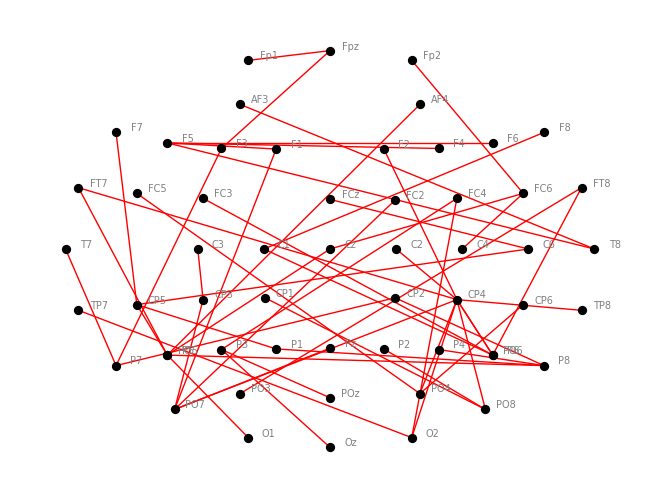

In [467]:
#Minimum spanning tree
from networkx.algorithms import tree
#We create new weights for the minimum spanning tree (1/weights)
new_weights = []

for i in range(0,len(weights)):
	new_weights.append(1/weights[i]) #Stronger connection will have a shortest distance

new_weights = tuple(new_weights) #convert the list to tuple
#This part does not show the real MST, I have no idea why. I solved it using the maximum spanning tree
#T=nx.minimum_spanning_tree(G,new_weights) #Minimum spanning tree
T = nx.maximum_spanning_tree(G) #This should do extactly the same thing as using w = 1/w as it maximise the distance
nx.draw(T,pos,node_size=32,node_color='black',edge_color='red')
nx.draw_networkx_labels(T,label_pos,font_size=7,font_color='grey')
plt.show()

In [468]:
# Minimum spanning tree Metrics
#We plot the adjacency matrix
from networkx import adjacency_matrix
A = nx.adjacency_matrix(T)
links = len(T.edges)

In [470]:
T.edges()

EdgeView([('Fp1', 'Fpz'), ('Fpz', 'F3'), ('Fp2', 'FC6'), ('F7', 'CP5'), ('F3', 'P7'), ('F4', 'F5'), ('F8', 'C1'), ('FC5', 'PO4'), ('FC2', 'PO7'), ('FC6', 'C4'), ('FC6', 'Cz'), ('T7', 'P7'), ('C3', 'CP3'), ('Cz', 'PO5'), ('T8', 'F5'), ('T8', 'AF3'), ('CP5', 'P1'), ('CP5', 'C6'), ('CP5', 'P5'), ('CP1', 'PO8'), ('CP2', 'P8'), ('CP2', 'P7'), ('CP6', 'PO4'), ('P3', 'FC4'), ('P3', 'POz'), ('P3', 'Oz'), ('Pz', 'PO7'), ('P4', 'P8'), ('P8', 'PO5'), ('P8', 'P1'), ('O1', 'P5'), ('O2', 'CP4'), ('O2', 'FC4'), ('O2', 'TP7'), ('AF4', 'PO5'), ('F5', 'F1'), ('F5', 'F6'), ('F1', 'PO7'), ('F2', 'CP4'), ('FC3', 'P6'), ('FCz', 'C6'), ('C1', 'P6'), ('C2', 'CP4'), ('CP3', 'PO7'), ('CP4', 'PO7'), ('CP4', 'PO4'), ('CP4', 'FT7'), ('CP4', 'PO8'), ('CP4', 'P6'), ('CP4', 'PO6'), ('CP4', 'TP8'), ('P2', 'PO8'), ('P6', 'FT8'), ('PO5', 'FT7'), ('PO3', 'FT8')])

In [480]:
# Metrics list
# Degree, leaf number, betweenness centrality (BC), eccentricity,
# diameter, hierarchy (Th), and degree correlation (R).
from networkx import diameter, eccentricity, betweenness_centrality
#LEAF node
leaf_n = 0
for x in T.edges:
    if len(x) == 1:
        leaf_n += 1
leaf_fraction = leaf_n/len(T.nodes) #Important values for between subject comparison


[('Fp1', 'Fpz'), ('Fpz', 'F3')]
[('Fpz', 'F3'), ('Fpz', 'Fp1'), ('F3', 'P7')]
[('Fp2', 'FC6'), ('FC6', 'C4'), ('FC6', 'Cz')]
[('F7', 'CP5'), ('CP5', 'P1'), ('CP5', 'C6'), ('CP5', 'P5')]
[('F3', 'Fpz'), ('F3', 'P7'), ('P7', 'T7'), ('P7', 'CP2')]
[('F4', 'F5'), ('F5', 'T8'), ('F5', 'F1'), ('F5', 'F6')]
[('F8', 'C1'), ('C1', 'P6')]
[('FC5', 'PO4'), ('PO4', 'CP4'), ('PO4', 'CP6')]
[('FC2', 'PO7'), ('PO7', 'F1'), ('PO7', 'CP4'), ('PO7', 'Pz'), ('PO7', 'CP3')]
[('FC6', 'C4'), ('FC6', 'Cz'), ('FC6', 'Fp2')]
[('FC6', 'C4'), ('FC6', 'Cz'), ('FC6', 'Fp2'), ('Cz', 'PO5')]
[('T7', 'P7'), ('P7', 'CP2'), ('P7', 'F3')]
[('C3', 'CP3'), ('CP3', 'PO7')]
[('Cz', 'FC6'), ('Cz', 'PO5'), ('PO5', 'P8'), ('PO5', 'AF4'), ('PO5', 'FT7')]
[('T8', 'F5'), ('T8', 'AF3'), ('F5', 'F1'), ('F5', 'F6'), ('F5', 'F4')]
[('T8', 'F5'), ('T8', 'AF3')]
[('CP5', 'P1'), ('CP5', 'C6'), ('CP5', 'P5'), ('CP5', 'F7'), ('P1', 'P8')]
[('CP5', 'P1'), ('CP5', 'C6'), ('CP5', 'P5'), ('CP5', 'F7'), ('C6', 'FCz')]
[('CP5', 'P1'), ('CP5', '

0.0

In [491]:
#Max degree in the MST
max_degree = 0
for i in T.nodes:
    val = T.degree[i]
    if val > max_degree:
        max_degree = val
max_degree

10

In [495]:
#Diameter and eccentricity
nx_diameter = diameter(T, e=None)
nx_eccentricity = eccentricity(T, v=None, sp=None)
# Betweenness centrality (BC) and BCmax
nx_btw_centrality = betweenness_centrality(T, k=None, normalized=True, weight=None, endpoints=False, seed=None)

# Applying round to the betweenness centrality to show only the first 3 values
nx_btw_max = 0
for i in T.nodes:
    val = nx_btw_centrality[i]
    if val > nx_btw_max:
        nx_btw_max = val

#Tree hierarchy (Th=L/(2mBCmax))
nx_th = leaf_n/(2*links*nx_btw_max) #TO BE CHECKED

# Degree correlation
from networkx import  degree_pearson_correlation_coefficient
nx_d = degree_pearson_correlation_coefficient(T, weight=None, nodes=None)



In [496]:
#Plot the adjacency matrix
def plot_adjacency_matrix(A):
    import numpy as np
    import matplotlib.pyplot as plt
    A = A.todense()
    plt.imshow(A);
    plt.xlabel('Channels')
    plt.show()
    return

In [499]:
#####################
def plot_degree_distribution (G):
    import collections
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)
    # draw graph in inset
    plt.axes([0.4, 0.4, 0.5, 0.5])
    #Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
    Gcc = sorted(G.subgraph(c) for c in nx.connected_components(G))
    pos = nx.spring_layout(G)
    plt.axis('off')
    nx.draw_networkx_nodes(G, pos, node_size=20)
    nx.draw_networkx_edges(G, pos, alpha=0.4)
    plt.show()
    return

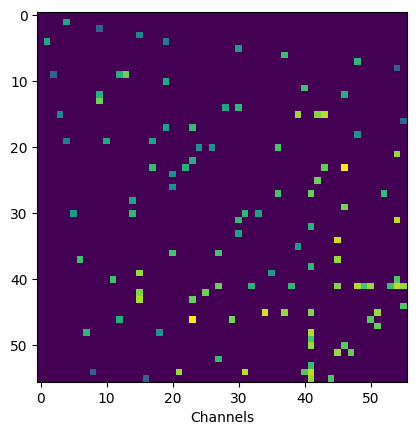

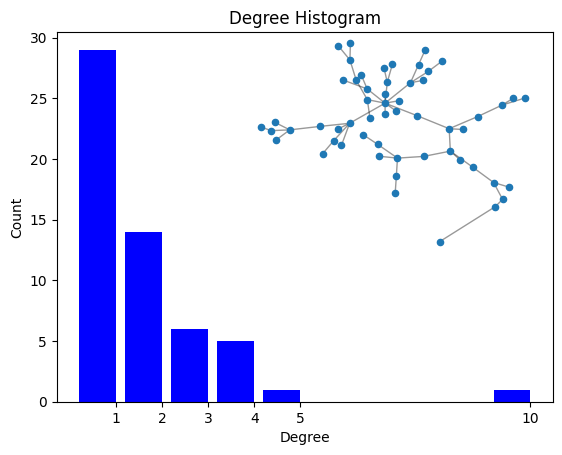

Number of nodes:  56  Number of edges:  55
Number of leaf nodes:  0
Leaf fraction:  0.0
Max degree: 10
Diameter: 13
Eccentricity: {'Fp1': 13, 'Fpz': 12, 'Fp2': 10, 'F7': 11, 'F3': 11, 'F4': 12, 'F8': 11, 'FC5': 10, 'FC2': 10, 'FC6': 9, 'T7': 11, 'C3': 11, 'Cz': 8, 'C4': 10, 'T8': 12, 'CP5': 10, 'CP1': 10, 'CP2': 9, 'CP6': 10, 'P7': 10, 'P3': 11, 'Pz': 10, 'P4': 9, 'P8': 8, 'POz': 12, 'O1': 12, 'Oz': 12, 'O2': 9, 'AF3': 13, 'AF4': 8, 'F5': 11, 'F1': 10, 'F2': 9, 'F6': 12, 'FC3': 10, 'FCz': 12, 'FC4': 10, 'C1': 10, 'C2': 9, 'C6': 11, 'CP3': 10, 'CP4': 8, 'P5': 11, 'P1': 9, 'P2': 10, 'P6': 9, 'PO5': 7, 'PO3': 11, 'PO4': 9, 'PO6': 9, 'FT7': 7, 'FT8': 10, 'TP7': 10, 'TP8': 9, 'PO7': 9, 'PO8': 9}
Betweenness centrality:  {'Fp1': 0.0, 'Fpz': 0.03636363636363637, 'Fp2': 0.0, 'F7': 0.0, 'F3': 0.07138047138047138, 'F4': 0.0, 'F8': 0.0, 'FC5': 0.0, 'FC2': 0.0, 'FC6': 0.07205387205387206, 'T7': 0.0, 'C3': 0.0, 'Cz': 0.10505050505050506, 'C4': 0.0, 'T8': 0.03636363636363637, 'CP5': 0.17373737373737

In [500]:
#### Printing and plotting all the measures #####
plot_adjacency_matrix(A)
# We can plot the degree distribution
plot_degree_distribution(T)

print('Number of nodes: ', len(T.nodes), ' Number of edges: ', len(T.edges))
print ('Number of leaf nodes: ', leaf_n)
print ('Leaf fraction: ', leaf_fraction)
print ('Max degree:', max_degree)
print ('Diameter:', nx_diameter)
print ('Eccentricity:', nx_eccentricity)
print ('Betweenness centrality: ', nx_btw_centrality,2)
print ('Max BC:', nx_btw_max)
print('Tree hierarchy: ', nx_th)
print('Degree correlation: ', nx_d)

In [557]:
#get indexes of central electrodes
central = [i for i in range(len(epochs.ch_names)) if (ord(epochs.ch_names[i][-1])< ord("0") or ord(epochs.ch_names[i][-1])>ord("9"))]
#remove for plotting
temp = array
temp = np.delete(temp, central, axis=1)

names = [epochs.ch_names[i] for i in central]
names_left_right = [i for i in epochs.ch_names if i not in names]

info = mne.create_info(ch_names=names_left_right,
                       ch_types=['eeg'] * temp.shape[1],
                       sfreq=sampling_freq)

epochs = mne.EpochsArray(temp, info)

con = mne_connectivity.spectral_connectivity_epochs(epochs[min_epochs:max_epochs], method='pli', mode='multitaper', sfreq=sfreq, fmin=fmin, fmax=fmax,
    faverage=True, tmin=tmin, mt_adaptive=False, n_jobs=1)

Not setting metadata
425 matching events found
No baseline correction applied
0 projection items activated
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 1225 connections
    using t=0.000s..2.412s for estimation (604 points)
    frequencies: 8.3Hz..12.8Hz (12 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11


C:\Users\nunok\AppData\Local\Temp\ipykernel_5924\2257078029.py:16: RuntimeWarning:

There were no Annotations stored in <EpochsArray |  425 events (all good), 0 - 2.412 sec, baseline off, ~98.0 MB, data loaded,
 '1': 425>, so metadata was not modified.



    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for epoch 17
    computing connectivity for epoch 18
    computing connectivity for epoch 19
    computing connectivity for epoch 20
    computing connectivity for epoch 21
    computing connectivity for epoch 22
    computing connectivity for epoch 23
    computing connectivity for epoch 24
    computing connectivity for epoch 25
    computing connectivity for epoch 26
    computing connectivity for epoch 27
    computing connectivity for epoch 28
    computing connectivity for epoch 29
    computing connectivity for epoch 30
    computing connectivity for epoch 31
    computing connectivity for epoch 32
    computing connectivity for epoch 33
    computing connectivity for epoch 34
    computing connectivity for epoch 35
    computing connectivity for epoch 36


In [604]:
matrix = con.get_data(output='dense')[:, :, 0]

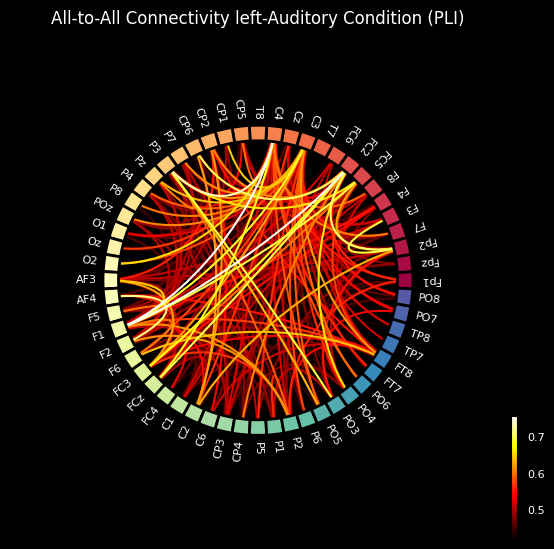

(<Figure size 800x800 with 2 Axes>,
 <PolarAxes: title={'center': 'All-to-All Connectivity left-Auditory Condition (PLI)'}>)

In [511]:
from mne_connectivity.viz import plot_connectivity_circle
plot_connectivity_circle(matrix, n_lines=300,
                         title='All-to-All Connectivity left-Auditory '
                               'Condition (PLI)', node_names=epochs.ch_names)

In [ ]:
#left hemisphere (impar)
left = [epochs.ch_names[i] for i in range(len(epochs.ch_names)) if int(epochs.ch_names[i][-1])%2 != 0]
#right
right = [epochs.ch_names[i] for i in range(len(epochs.ch_names)) if int(epochs.ch_names[i][-1])%2 == 0]

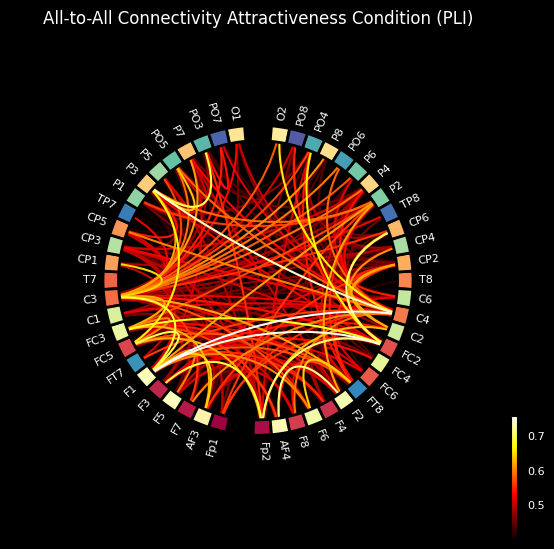

In [635]:
# Connectivity Plot
#label_colors = [label.color for label in ]
# First, we reorder the labels based on their location in the left hemi
left_coord = {key:value for key,value in coord.items() if key in left}

#order based on higher y
def order(dici):
    keys = list(dici.keys())
    values = list(dici.values())
    ordered = []
    for i in range(len(keys)):
        for j in range(i+1,len(keys)):
            if values[j][1] > values[i][1]:
                temp = keys[i]
                keys[i] = keys[j]
                keys[j] = temp

                temp = values[i]
                values[i] = values[j]
                values[j] = temp
    return keys


# For the right hemi
right_coord = {key:value for key,value in coord.items() if key in right}

# Save the plot order and create a circular layout
node_order = list()
node_order.extend(order(left_coord)[::-1])  # reverse the order
node_order.extend(order(right_coord))

from mne.viz import circular_layout
node_angles = circular_layout(epochs.ch_names, node_order, start_pos=90,
                              group_boundaries=[0, (len(epochs.ch_names) / 2) -1]) #check par ou impar

# Plot the graph using node colors from the FreeSurfer parcellation. We only
# show the 300 strongest connections.
fig, ax = plt.subplots(figsize=(8, 8), facecolor='black',
                       subplot_kw=dict(polar=True))

plot_connectivity_circle(matrix, epochs.ch_names, n_lines=300,
                         node_angles=node_angles,
                         title='All-to-All Connectivity Attractiveness '
                               'Condition (PLI)' ,ax=ax)
fig.tight_layout()

In [591]:
from mne_connectivity.viz import plot_connectivity_circle